In [124]:
%load_ext autoreload
%autoreload 2
import os
import GCRCatalogs
import time
import matplotlib.pyplot as plt
import pickle
import sys
import clmm
import clmm.dataops as da
import glob
import numpy as np
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import sys
import photoz_utils as utils
import see_cl as see
from astropy.table import Table
def load(filename, **kwargs):
    """Loads GalaxyCluster object to filename using Pickle"""
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)
    from clmm.dataops import compute_galaxy_weights
from clmm import Cosmology
from scipy.integrate import simps
cosmo = Cosmology(H0 = 71.0, Omega_dm0 = 0.265 - 0.0448, Omega_b0 = 0.0448, Omega_k0 = 0.0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
def delete_file(list_filename):
     for f in list_filename:
        os.remove(f)

In [126]:
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import edit

In [127]:
file = glob.glob('/sps/lsst/users/cpayerne/CLMassDC2/cosmoDC2/redmapper_clusters/l*')
lens_cat = edit.load_pickle('/pbs/throng/lsst/users/cpayerne/CLMassDC2/data/lens_catalog_cosmoDC2_v1.1.4_redmapper_v0.8.1.pkl')

In [128]:
len(file)

5224

In [129]:
cluster_id_saved = []
for f in file:
    cluster_id_saved.append(int(f.split('.pkl')[0].split('halo_')[1]))

# Check extraction

In [130]:
lens_cat = edit.load_pickle('/pbs/throng/lsst/users/cpayerne/CLMassDC2/data/lens_catalog_cosmoDC2_v1.1.4_redmapper_v0.8.1.pkl')

In [131]:
index = 100
cltest = edit.load_pickle(file[index])
cluster_id = int(file[index].split('.pkl')[0].split('halo_')[1])
lens = lens_cat[lens_cat['cluster_id'] == cluster_id][0]
ra, dec, z = lens['ra'], lens['dec'], lens['redshift']

In [132]:
see.check(cltest, ra, dec, z, cosmo)

['ra', 'dec', 'z', 'galaxy_id', 'mag_i', 'mag_r', 'mag_y', 'shear1', 'shear2', 'kappa', 'e1_true', 'e2_true', 'g1', 'g2', 'e1', 'e2', 'sigma_c_photoz_bpz', 'p_background_bpz', 'photoz_err_bpz', 'sigma_c_photoz_estimate_0_bpz', 'sigma_c_photoz_estimate_1_bpz', 'sigma_c_photoz_estimate_2_bpz', 'z_estimate_0_bpz', 'z_estimate_1_bpz', 'z_estimate_2_bpz', 'photoz_mean_bpz', 'photoz_mode_bpz', 'photoz_odds_bpz', 'sigma_c_photoz_flex', 'p_background_flex', 'photoz_err_flex', 'sigma_c_photoz_estimate_0_flex', 'sigma_c_photoz_estimate_1_flex', 'sigma_c_photoz_estimate_2_flex', 'z_estimate_0_flex', 'z_estimate_1_flex', 'z_estimate_2_flex', 'photoz_mean_flex', 'photoz_mode_flex', 'photoz_odds_flex']
cluster: ra, dec = 58.81460762902159,-42.18618298743182
cluster: z = 0.99118865
----
galaxies: maximum distance = 10.099828858415187
galaxies: minimum redshift = 1.0412308173275289
galaxies: minimum ra, maximum ra = 58.34383768594898,59.28430766305098
galaxies: minimum dec, maximum dec = -42.534032496

# Check missing extraction

In [133]:
lens_cat_to_extract = lens_cat[(lens_cat['richness'] > 20)*(lens_cat['redshift'] > .2)]
print(len(lens_cat_to_extract))

4240


In [134]:
mask = np.isin(lens_cat_to_extract['cluster_id'], cluster_id_saved)

In [135]:
lens_cat_miss = lens_cat_to_extract[np.invert(mask)]
print(len(lens_cat_miss))

632


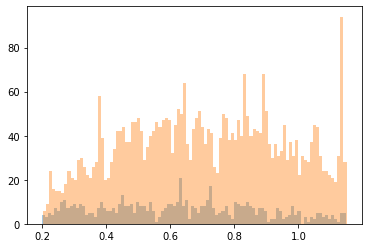

In [136]:
plt.hist(lens_cat_to_extract[np.invert(mask)]['redshift'], alpha=.4, bins=100)
plt.hist(lens_cat_to_extract[mask]['redshift'], alpha=.4, bins=100)
plt.show()